# <center> Concevez une application au service de la santé publique <center>

## <center> Notebook de Nettoyage </center>

## Table des matières <a id="table">



**- 1 - Chargement des librairies et le jeu de données**

**- 2 - Nettoyages effectué ** 
  
        - 2.1 - La mise en forme de nom de colonnes
        - 2.2 - Typage de données
        - 2.3 - Traitement des doublons
        - 2.4 - Vu sur le taux de remplissage	
        - 2.5 - Macro Analyse univarié (la distribution de données)
        - 2.6 - Traitement  des valeurs aberrantes 
        - 2.7 - Traitement des valeurs manquantes
    
**- 3 - Idée de l'application : introduction au régime cétogène (Ketogenic diet)**

**- 4 Filtrer le jeu de donnée en function d'idée de l'appli**
        - 4.1 Choix des variable potentiellement perinentes pour l'application
        - 4.2 Choisir définitif des variables
        
**- 5 Identifier le type de « missingness » des données**


### 1- Chargement des librairies et le jeu de données

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime
from pandas.api.types import is_numeric_dtype

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import time

%matplotlib inline

In [2]:
 #Chargement de la base de donénes Open Food facts téléchargée sous format .csv
data = pd.read_csv(r"C:\Users\faeze\Documents\OC data science\PROJECT\Projet3\en.openfoodfacts.org.products.csv",
                  sep='\t', parse_dates=True, low_memory=True)

In [3]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Copier le jeu de donnée initial pour le traitement 
df= data.copy()

# La dimension de data frame
print('nbre de ligne:', df.shape[0])
print('nbre de colonne:', df.shape[1])

nbre de ligne: 2011182
nbre de colonne: 187


In [5]:
# Afficher le nom des colonnes
df.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_t

In [6]:
#Supprimer des variables qui ne sont pas des éléments de nutrition 
df = df.drop(["carbon-footprint_100g","carbon-footprint-from-meat-or-fish_100g",
                            'created_t' , 'last_modified_t'], axis = 1)

### 2.1 - La mise en forme de nom de colonnes


In [7]:
# repmlacer les '-' par '_'
df.columns = df.columns.str.replace("-", "_")

# supprimer les tirets au début de nom des colonnes 
def clean_col_name(dataframe):

    columns = dataframe.columns
   

    dataframe.columns = columns_treated
    return dataframe

df = clean_col_name(df)

In [8]:
# vérifier si les '-' sont remplacé par '_'

clean_name_df = df.iloc[:,df.columns.str.contains('-')]
clean_name = clean_name_df.columns.tolist()

clean_name

[]

### 2.2 - Typage de données

In [9]:
print(df.dtypes)

code                       object
url                        object
creator                    object
created_datetime           object
last_modified_datetime     object
                           ...   
choline_100g              float64
phylloquinone_100g        float64
beta_glucan_100g          float64
inositol_100g             float64
carnitine_100g            float64
Length: 183, dtype: object


In [10]:
df.dtypes.value_counts()

float64    123
object      60
dtype: int64

In [11]:
# Convertir à datatime
df['last_modified_datetime'] = pd.to_datetime(df['last_modified_datetime'],utc=True)
df['created_datetime'] = pd.to_datetime(df['created_datetime'],utc=True)

In [12]:
# Vérifier la conversion à datetime  
df.dtypes.value_counts()

float64                123
object                  58
datetime64[ns, UTC]      2
dtype: int64

###  2.3 - Traitement des doublons

In [13]:
# Pourcentage de duplicats sur le variables "code"
print("Pourcentage de duplicats sur le variable 'code' : ", df.duplicated(subset =['code']).astype(int).mean())


# Ordonner le jeu de donne par la date de drnière modification 
df = df.sort_values(by=["last_modified_datetime"], ascending= False)

df1 = df.drop_duplicates(subset = ['code'], keep = 'last')

# Vérifier que les linges en doublons ont été supprimés
print("Pourcentage de duplicats sur le variable 'code' :",df1[df1['code'].duplicated() == True].shape[0])

# Afficher le nombre de code en doublons supprimés 
print("Nombre de ligne en doublon supprimées :", df.shape[0] - df1.shape[0], "\n")

Pourcentage de duplicats sur le variable 'code' :  0.00012082447038607148
Pourcentage de duplicats sur le variable 'code' : 0
Nombre de ligne en doublon supprimées : 243 



### 2.4 - Vue globale sur le taux de remplissage

In [14]:
# Function pour remplacer les null value par 'nan' reconnus par pandans
def clean_nan_col(dataframe) :
    try :    
           dataframe = dataframe.replace(to_replace = '^nan$', value = np.nan, regex=True)    
    
    except  :
        print("tous les faux nan ont été remplacés")
    return dataframe


# Appliquer la function "clean_nan_col" sur le jeu de donnée
df1= clean_nan_col(df)

In [15]:
# Function pour la proportion total de valeur manquantes à la taille de jeu de données
def taux_null_total(dataframe) : 
    return((dataframe.isnull().sum().sum()/dataframe.shape[0]/dataframe.shape[1])*100)

# Function pour afficher le taux de valeurs manquantes pour chaque variable 
def taux_null (dataframe) :
    print(pd.DataFrame(dataframe.isnull().sum()/dataframe.shape[0])*100)

In [16]:
print("Pourcentage de valeurs Null dans le jeu de donnée ", taux_null_total(df1))
print("****")
print("Le taux de valeurs Null % :" , taux_null(df1))

Pourcentage de valeurs Null dans le jeu de donnée  80.68957225181333
****
                                0
code                     0.000000
url                      0.000000
creator                  0.000199
created_datetime         0.000000
last_modified_datetime   0.000000
...                           ...
choline_100g            99.996718
phylloquinone_100g      99.914876
beta_glucan_100g        99.998111
inositol_100g           99.996569
carnitine_100g          99.998061

[183 rows x 1 columns]
Le taux de valeurs Null % : None


- Environ 80.7% de jeu de données n'est pas renseigné. 
- Il y a des colonnes qui sont presque vides. 

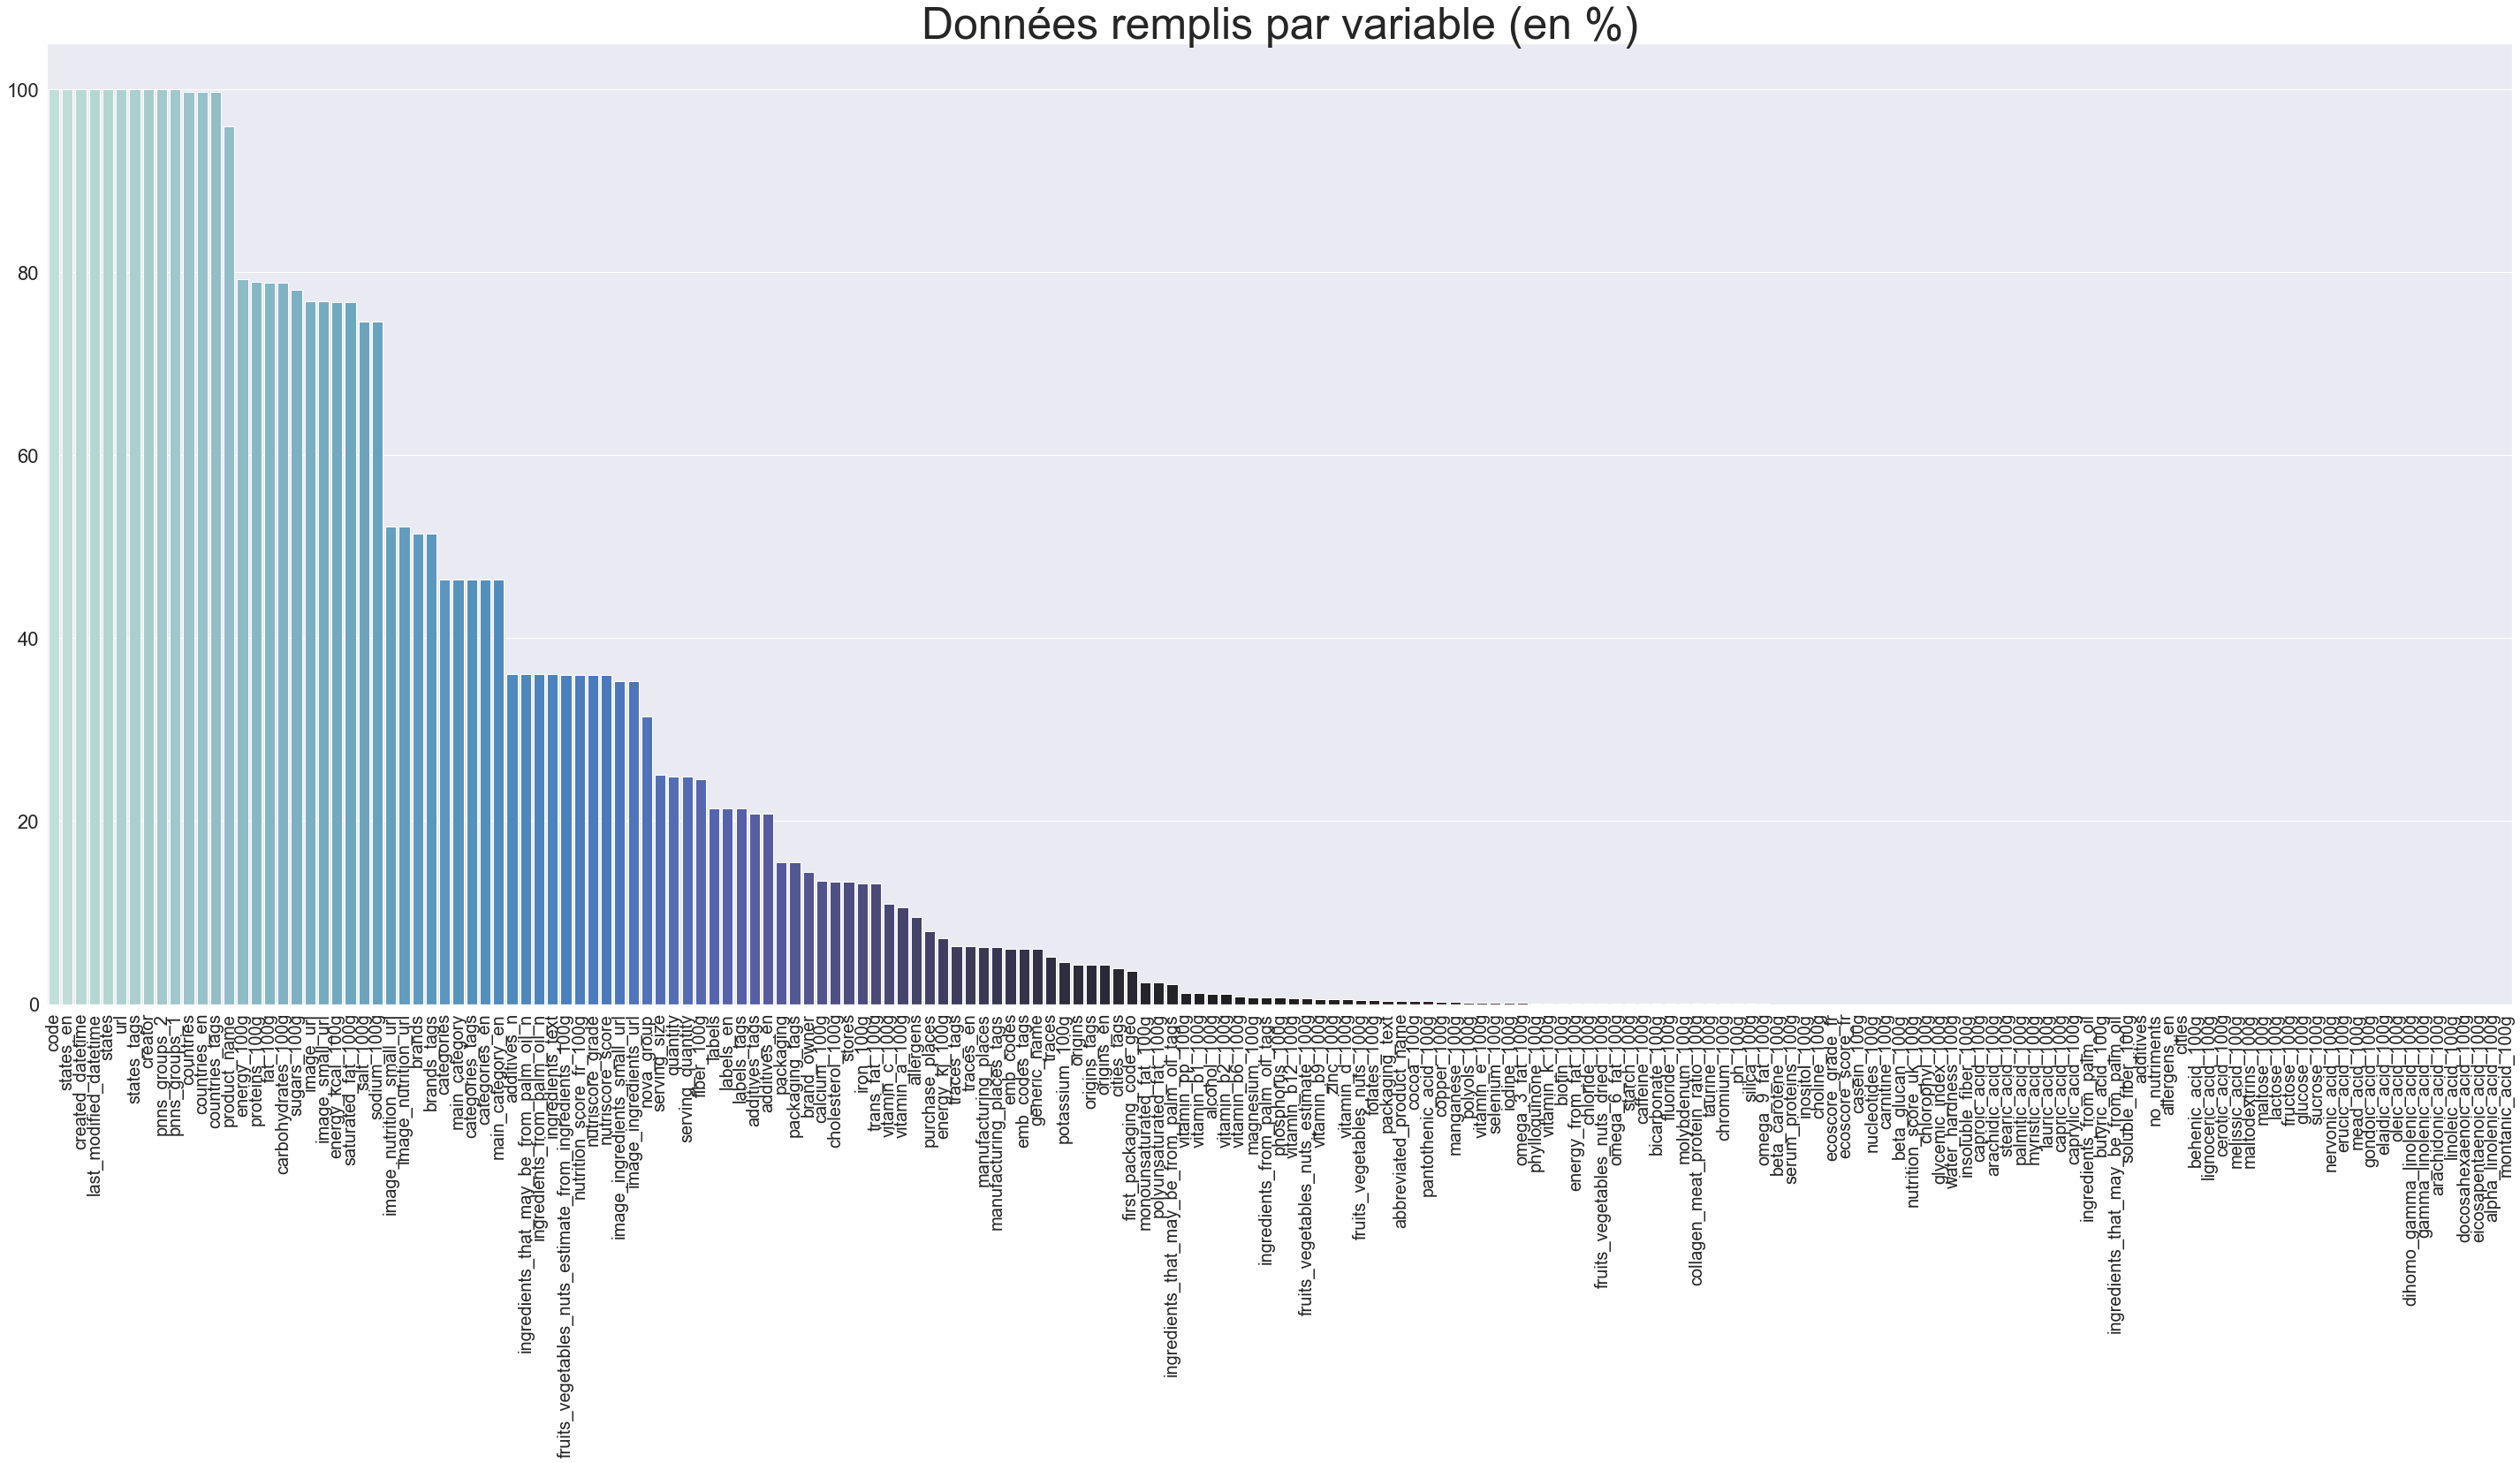

<Figure size 432x288 with 0 Axes>

In [17]:
#Taux de remplissage par variables 
rempli = (((df1.shape[0]-df1.isnull().sum())/df1.shape[0])*100).sort_values(ascending = False)


# Visualiser le taux de remplissage de jeu de données
plt.figure(figsize=(50, 20))
sns.set(font_scale = 2)
ax = sns.barplot(x = rempli.index, y=rempli.values, palette="icefire")
plt.xticks(rotation= 90, fontsize= 20)
plt.title('Données remplis par variable (en %)', size=50)
plt.show()

#Exporter la graphique
plt.savefig('Remplissage.png',orientation='portrait')

- On constate qu'il y a des variables qui sont composoées uniquement des Nan

In [18]:
# supprimer les colonnes vides
df2 =df1.dropna(axis=1, how="all")
print('Nombre des colonnes vides:', df1.shape[1]- df2.shape[1])

Nombre des colonnes vides: 41


###  2.5 - Macro Analyse univarié (la distribution de données)


In [19]:
# identifier les variables numériques
df_number = df2.loc[:, df2.dtypes == np.number]
col_num = df_number.columns.tolist()

In [20]:
# La distribution des variables numériques 

#for column in col_num :
#   plt.figure(column)
#   plt.title(column)
#    sns.set(font_scale = 1)
#    ax = sns.distplot(df2[column], hist=True,
#                      hist_kws={"edgecolor": 'w', "linewidth": 1},
#                 kde_kws={"linewidth":1})

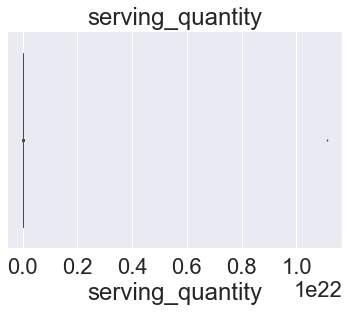

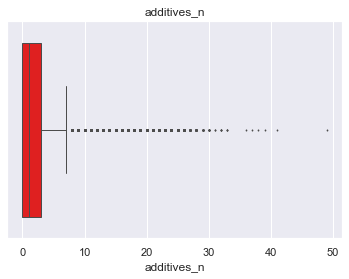

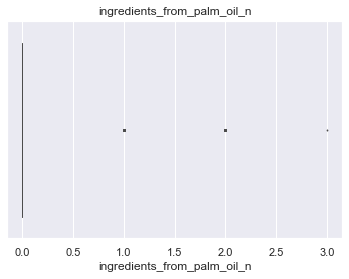

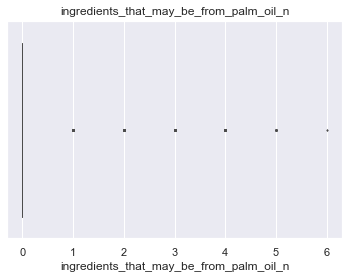

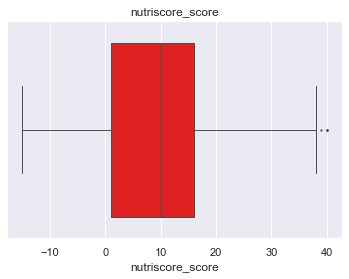

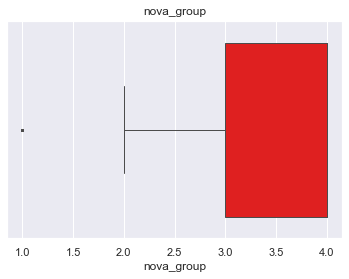

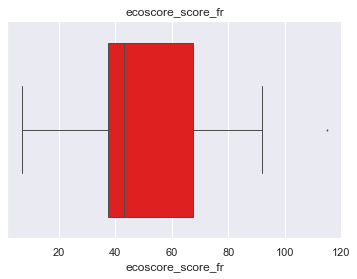

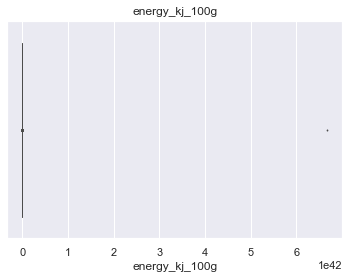

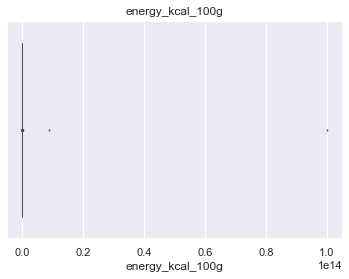

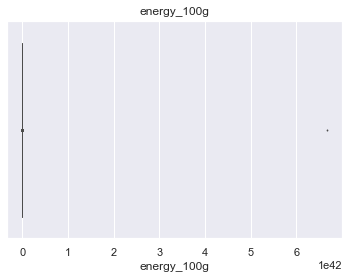

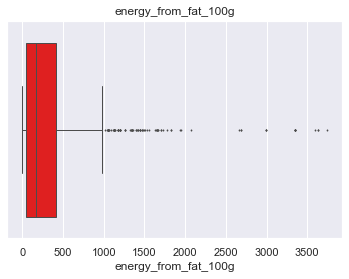

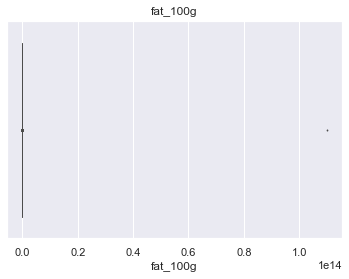

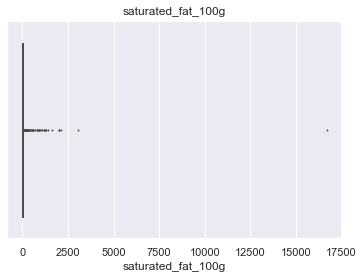

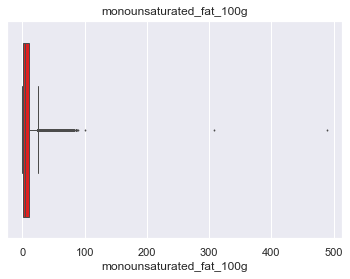

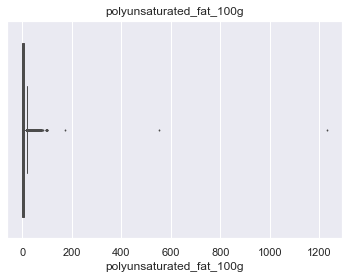

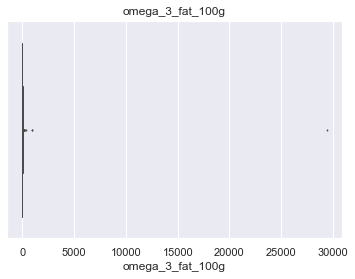

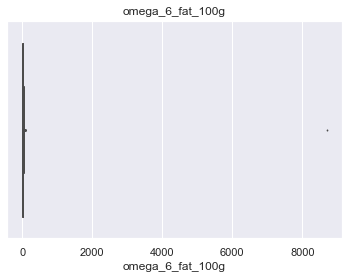

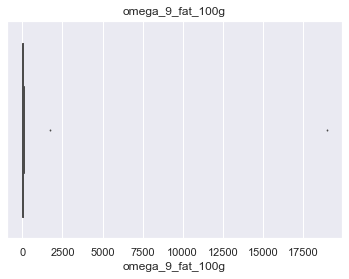

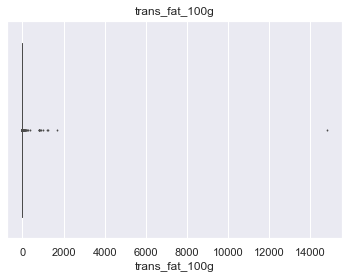

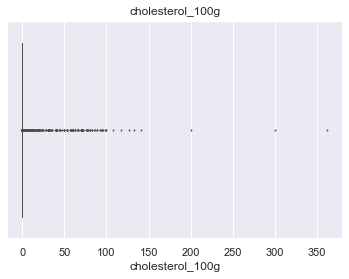

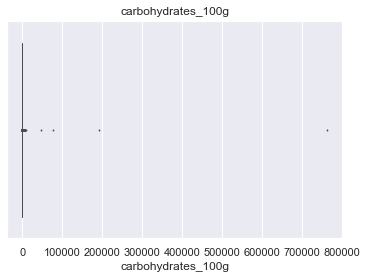

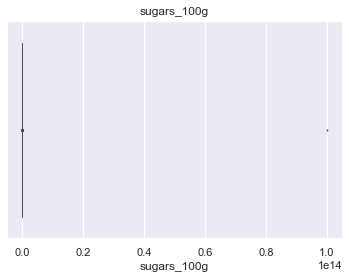

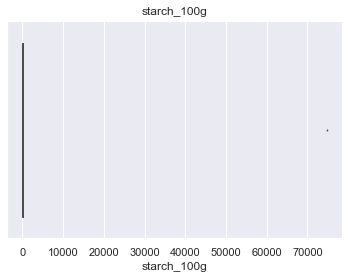

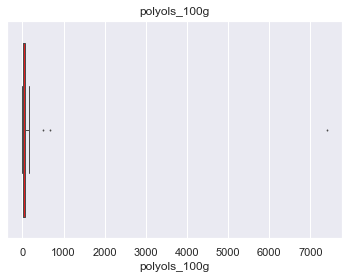

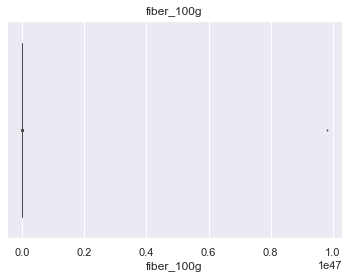

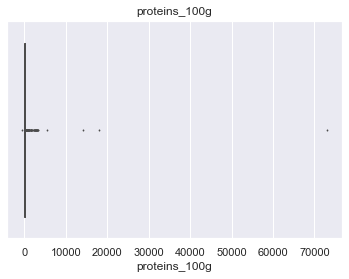

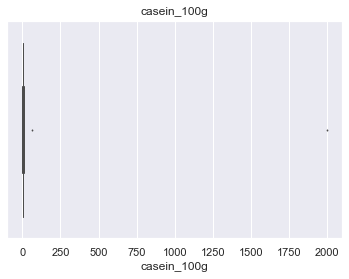

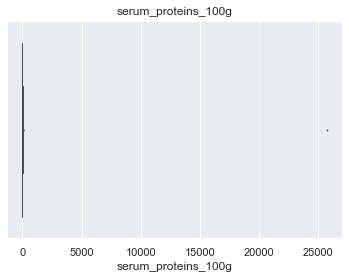

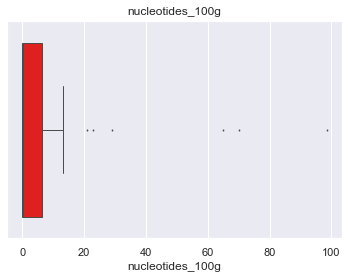

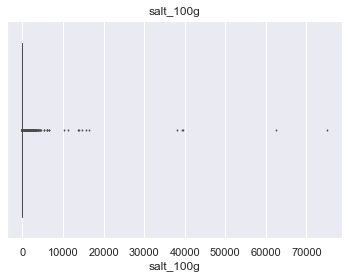

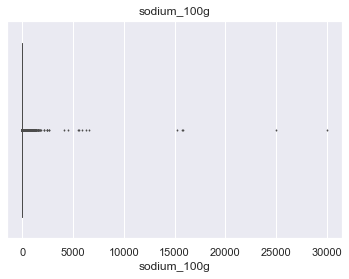

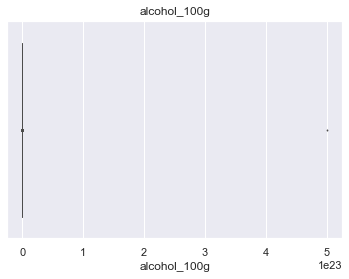

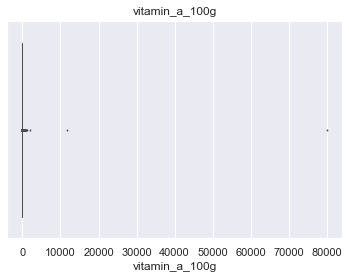

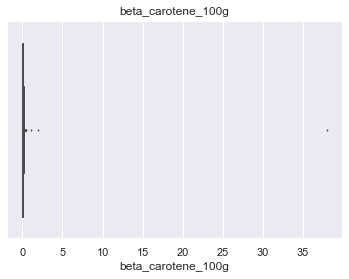

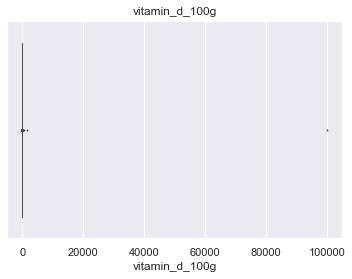

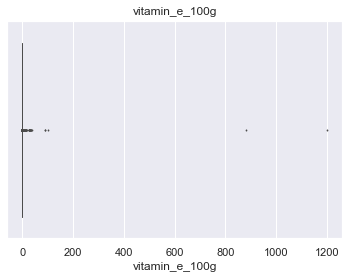

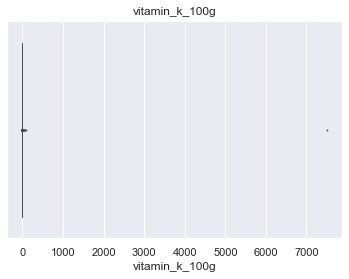

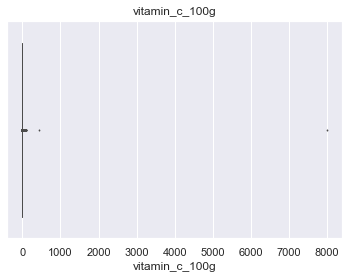

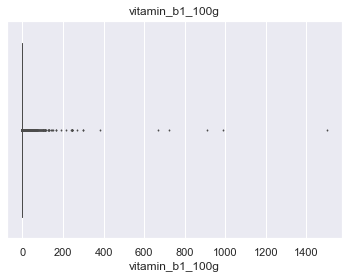

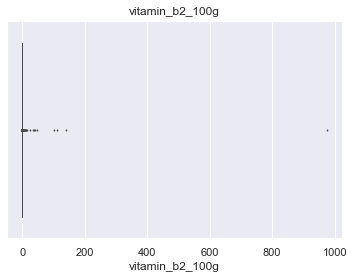

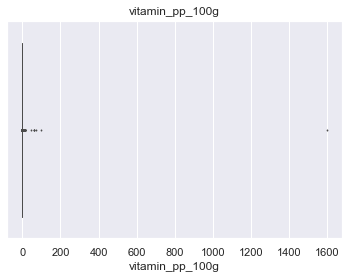

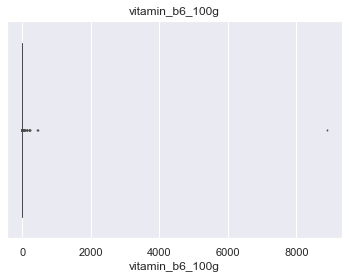

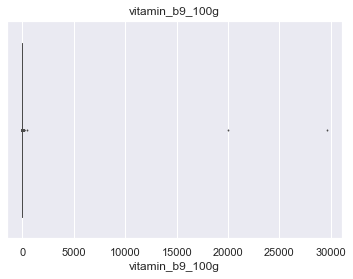

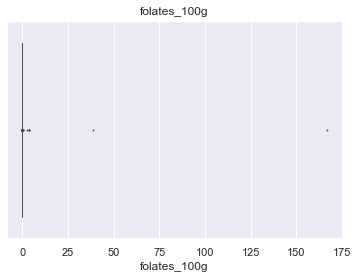

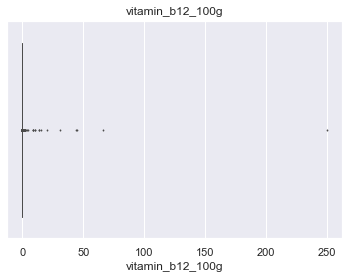

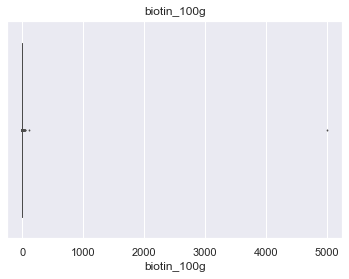

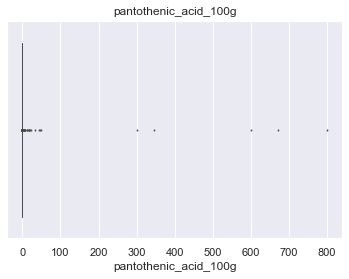

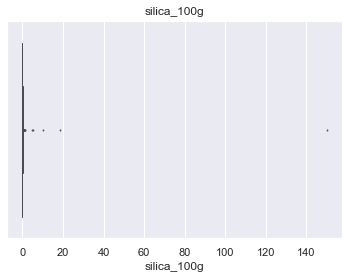

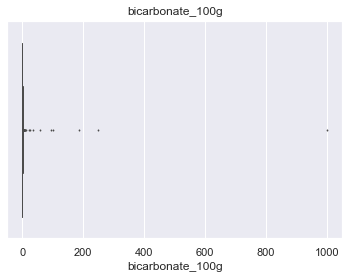

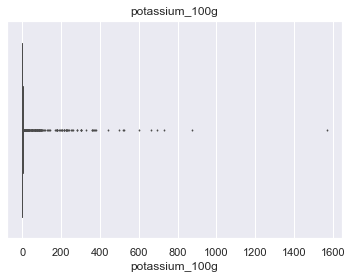

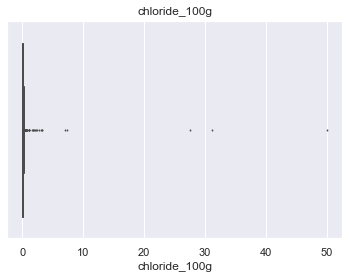

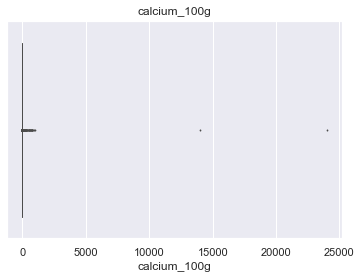

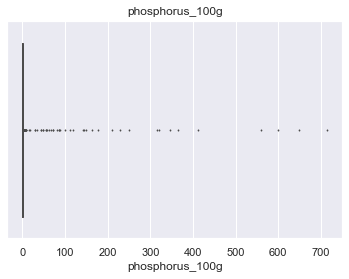

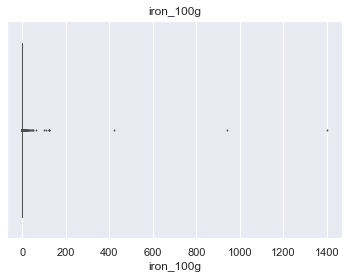

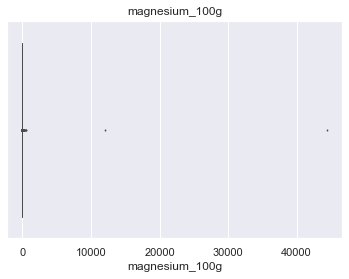

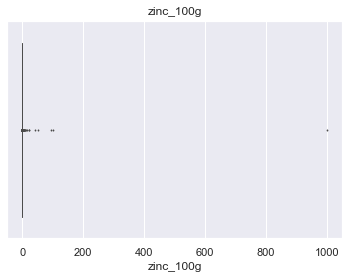

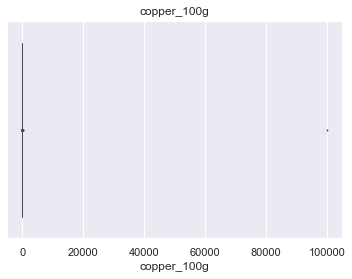

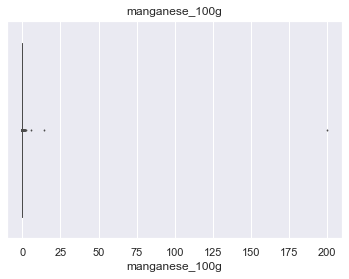

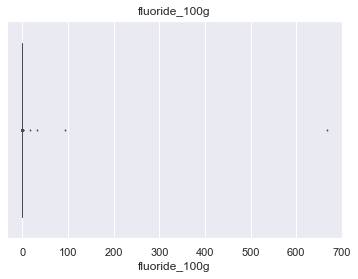

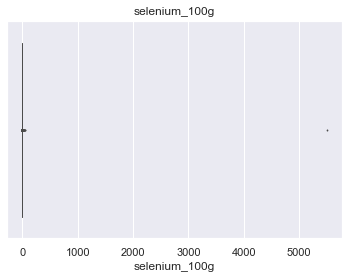

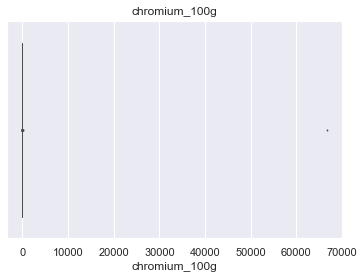

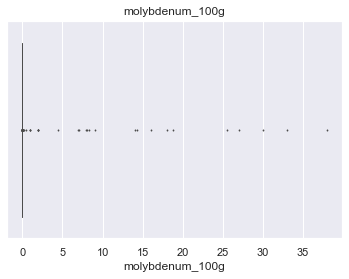

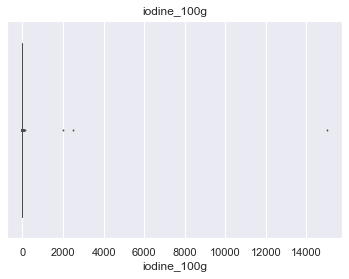

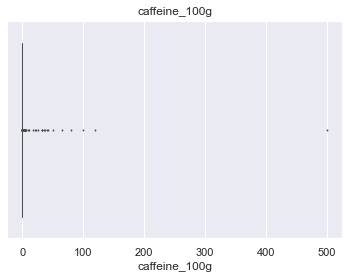

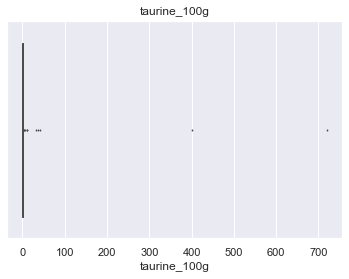

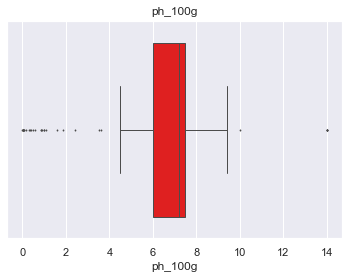

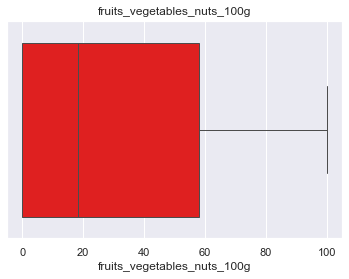

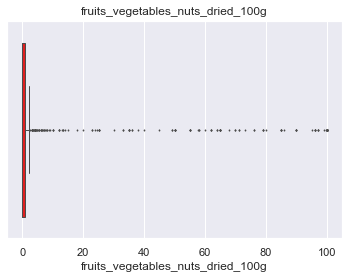

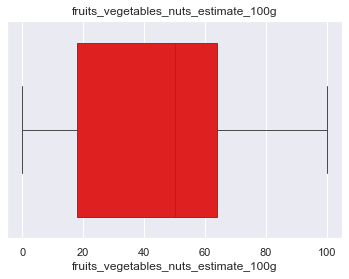

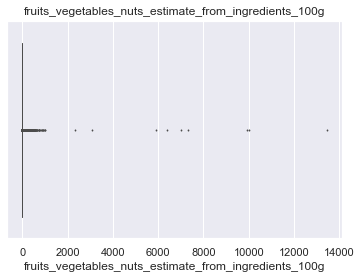

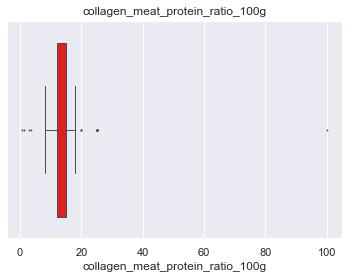

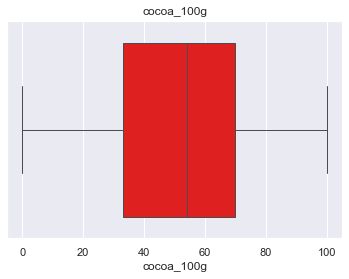

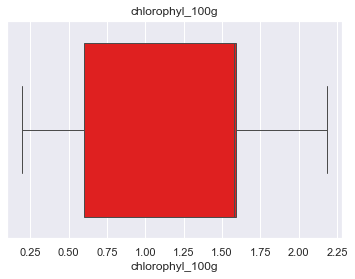

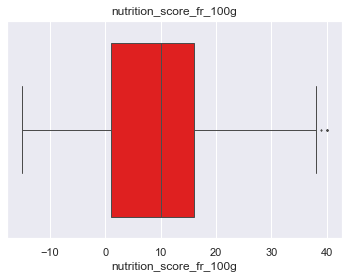

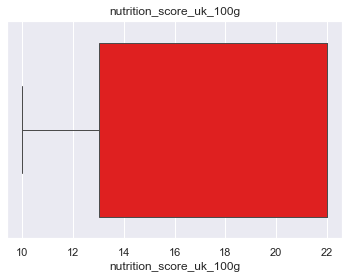

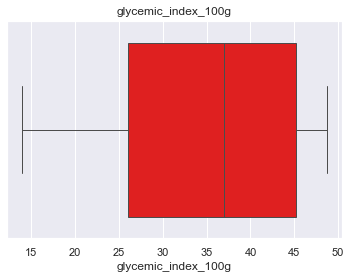

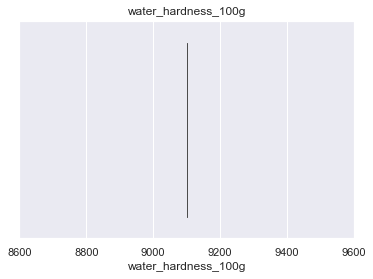

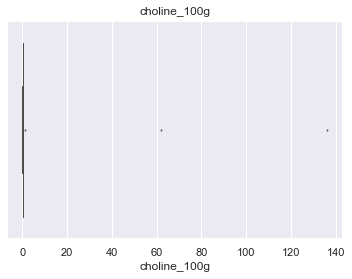

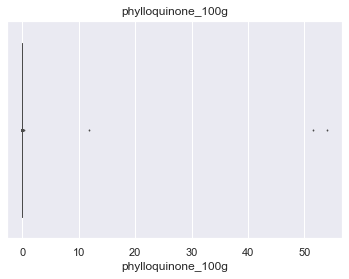

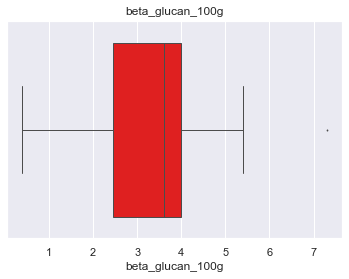

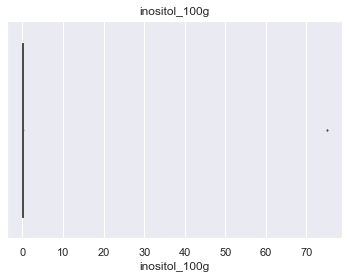

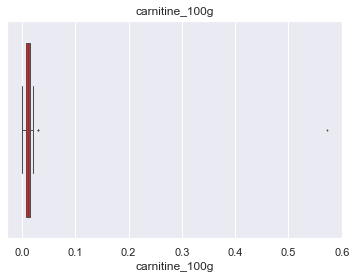

In [21]:
# Visualisation des valeurs abberantes avec boxplot
for column in col_num :
    plt.figure(column)
    plt.title(column)
    sns.set(font_scale = 1)
    ax = sns.boxplot(df2[column], color = 'red', fliersize = 1, linewidth = 1)     

### 2.6 - Traitement  des valeurs aberrantes 

#### Bilan sur la visualisation des distribution des chaque variables 

 -**Le boxplot détecte bcp de valuers aberrantes dans le jeu de donnée**


   - **On traite les valeurs aberrante en trois étape :**

  - I  - Les valeurs aberrantes pour le nutriment en 100gr
          - Les valeur supérieurs à 100 et inférieur à 0. 
          - Les valeurs qui ne s'accordenet pas à cette [formule](http://www.monmenu.fr/s/calcul-des-calories-d-une-recette-pid145) : **energy_100g = (4xproteins)+(4xcarbohydrate)+(9xfat)**
  - II - Les valeurs aberrantes pour "energy-kcal_100 gr" avec IQR score

         
  - III - Les valeurs aberrante pour "servig quantity" avec IQRscore 
  
  
- On verra aussi que la méthode IQRscore pour détecter et supprimer les valeurs aberrantes est une méthode purement mécanique et ne convient pas au jeu de donnée.

   -**La méthode de IQR score** (des outliers du centile extrême):

    - IQR = Quartile3 – Quartile1 
    - upper = Q3 +1.5*IQR            
    - lower = Q1 – 1.5*IQR
           
- NB: On n'applique pas la  méthode "zscore", car celle_ci est utilisée lorsque la distribution de donnée est normale. 

In [22]:
# Function pour détecter et supprimer les valeurs aberrantes avec IQRscore

def iqr_supprimer_outliers(df_in):
     for col in col_num:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
        return(df_out)

df_test = iqr_supprimer_outliers(df1)
print("Nombre des lignes supprimées avec le traitment des valeurs abberantes avec IQR score :",
     df1.shape[0] - df_test.shape[0])

Nombre des lignes supprimées avec le traitment des valeurs abberantes avec IQR score : 1552360


 - **On constate qu'appliquer la méthode IQR score pour supprimer les outliers nous fait perdre beacoup d'information (1,552,360 observations)**
 - Cette méthodes n'est donc pas pertinente pour notre jeu de donnés 

##### I  - Les valeurs aberrantes pour le nutriment en 100gr > 100 et < 0

In [23]:
# Créer une liste des variables sur le 100g. 

list_100g = []

for i in df2.columns.tolist() :
    
        if (i[-5:] == '_100g') & (i != 'energy_100g') & (i != 'energy_kj_100g') &\
        (i != 'energy_kcal_100g') & (i !='energy_from_fat_100g') :
            list_100g.append(i)  

In [24]:
# Créer un dataframe avec les variables de nutriment dans 100gr
df_100g = df2[list_100g]


# Identifier les lignes dont la valeur est suppérieur à 100 ou inférieur à 0 
df_100g= df_100g[(df_100g>100).any(axis=1)|(df_100g<0).any(axis=1)]

# identifier l'index des lignes à supprimer 
outliers_index = df_100g.index

#Créer un nouveau dataframe en supprimant les index les valeurs suppérieur à 100 pour 100 gr de nutriments 
outliers_100g_removed1  = df2.drop(labels=outliers_index , axis=0)
print("Nombre des lignes supprimées : ", df2.shape[0] - outliers_100g_removed1.shape[0])

Nombre des lignes supprimées :  116491


In [25]:
#Identification des lignes remplies pour kcal et les éléments nutritifs
df_cal = outliers_100g_removed1.loc[:,["energy_kcal_100g","fat_100g", "proteins_100g", "carbohydrates_100g"]]

#Création d'une colonne calculée avec la valeur théorique de kcal
df_cal["kcal_calc"] = 9*df_cal["fat_100g"] + 4*df_cal["proteins_100g"] + 4*df_cal["carbohydrates_100g"]

#Création d'une colonne avec l'écart relatif en valeur absolue entre la valeur théorique et observée 
df_cal["diff"] = abs((df_cal["kcal_calc"] - df_cal["energy_kcal_100g"])/df_cal["kcal_calc"])

#Identification des lignes pour lesquelles cette différence est supérieure à 1
df_cal.loc[df_cal["diff"]>1,:]
index_cal = df_cal.loc[df_cal["diff"]>1,:].index

#Abandon de ces lignes dans le df
outliers_100g_removed2 = outliers_100g_removed1.drop(labels=index_cal, axis=0)


#####   - II - Les valeurs aberrantes pour "energy-kcal_100 gr" avec IQR score méthode

In [26]:
outliers_100g_removed2['energy_kcal_100g'].describe()

count    1.389431e+06
mean     6.257412e+06
std      7.375541e+09
min      0.000000e+00
25%      1.110000e+02
50%      2.700000e+02
75%      4.050000e+02
max      8.693855e+12
Name: energy_kcal_100g, dtype: float64

In [27]:
q1 = outliers_100g_removed2['energy_kcal_100g'].quantile(0.25)
q3 = outliers_100g_removed2['energy_kcal_100g'].quantile(0.75)
iqr = q3 - q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
energy_outlier = outliers_100g_removed2.loc[(outliers_100g_removed2['energy_kcal_100g'] < fence_low) | (outliers_100g_removed2['energy_kcal_100g'] > fence_high)]

#print("Nombre de lignes supprimées après le traitment des outliers avec IQR Score :", outliers_removed.shape[0] - energy_removed_outlier.shape[0])

energy_outlier_index = energy_outlier.index

energy_outliers_removed  = outliers_100g_removed2.drop(labels=energy_outlier_index, axis=0)

print("Nombre total des lignes supprimés après le traitement des valeurs abberantes pour l'energie:",outliers_100g_removed2.shape[0]- energy_outliers_removed.shape[0], "\n" )

Nombre total des lignes supprimés après le traitement des valeurs abberantes pour l'energie: 11345 



##### III - Les valeurs aberrante pour "servig quantity" avec IQRscore 

In [28]:
energy_outliers_removed['serving_quantity'].describe()

count    4.255470e+05
mean     2.611019e+16
std      1.703271e+19
min      0.000000e+00
25%      2.800000e+01
50%      4.500000e+01
75%      1.050000e+02
max      1.111111e+22
Name: serving_quantity, dtype: float64

In [29]:
q1_s = energy_outliers_removed['serving_quantity'].quantile(0.25)
q3_s = energy_outliers_removed['serving_quantity'].quantile(0.75)
iqr_s = q3 - q1 
fence_low_s  = q1_s-1.5*iqr
fence_high_s = q3_s+1.5*iqr
serving_outliers= energy_outliers_removed.loc[(energy_outliers_removed['serving_quantity'] < fence_low_s) | (energy_outliers_removed['serving_quantity'] > fence_high_s)]


serving_outliers_index = serving_outliers.index

serving_outliers_removed  = energy_outliers_removed.drop(labels=serving_outliers_index, axis=0)

df4 = serving_outliers_removed.copy()

print("La dimension de jeu de donnée après le traitement des valeurs abberantes :",df4.shape, "\n")
print("****")
print("Nombre total de lignes supprimées après le traitment des valeurs aberrantes :", df1.shape[0] - df4.shape[0])

La dimension de jeu de donnée après le traitement des valeurs abberantes : (1836113, 142) 

****
Nombre total de lignes supprimées après le traitment des valeurs aberrantes : 175069


- **En supprimant les outliesr on a perdu  175069 lignes de notre information qui , par rapport à la dimension de jeu de donnés n'est pas énorme**

### 2.7 - Traitement des valeurs manquantes

In [30]:
print("Pourcentage total des valeurs manquantes après de traiement des outleirs :", taux_null_total(df4))
print("****")
print(taux_null(df4))

Pourcentage total des valeurs manquantes après de traiement des outleirs : 75.74704909191088
****
                                0
code                     0.000000
url                      0.000000
creator                  0.000218
created_datetime         0.000000
last_modified_datetime   0.000000
...                           ...
choline_100g            99.996732
phylloquinone_100g      99.929961
beta_glucan_100g        99.999510
inositol_100g           99.996460
carnitine_100g          99.997876

[142 rows x 1 columns]
None


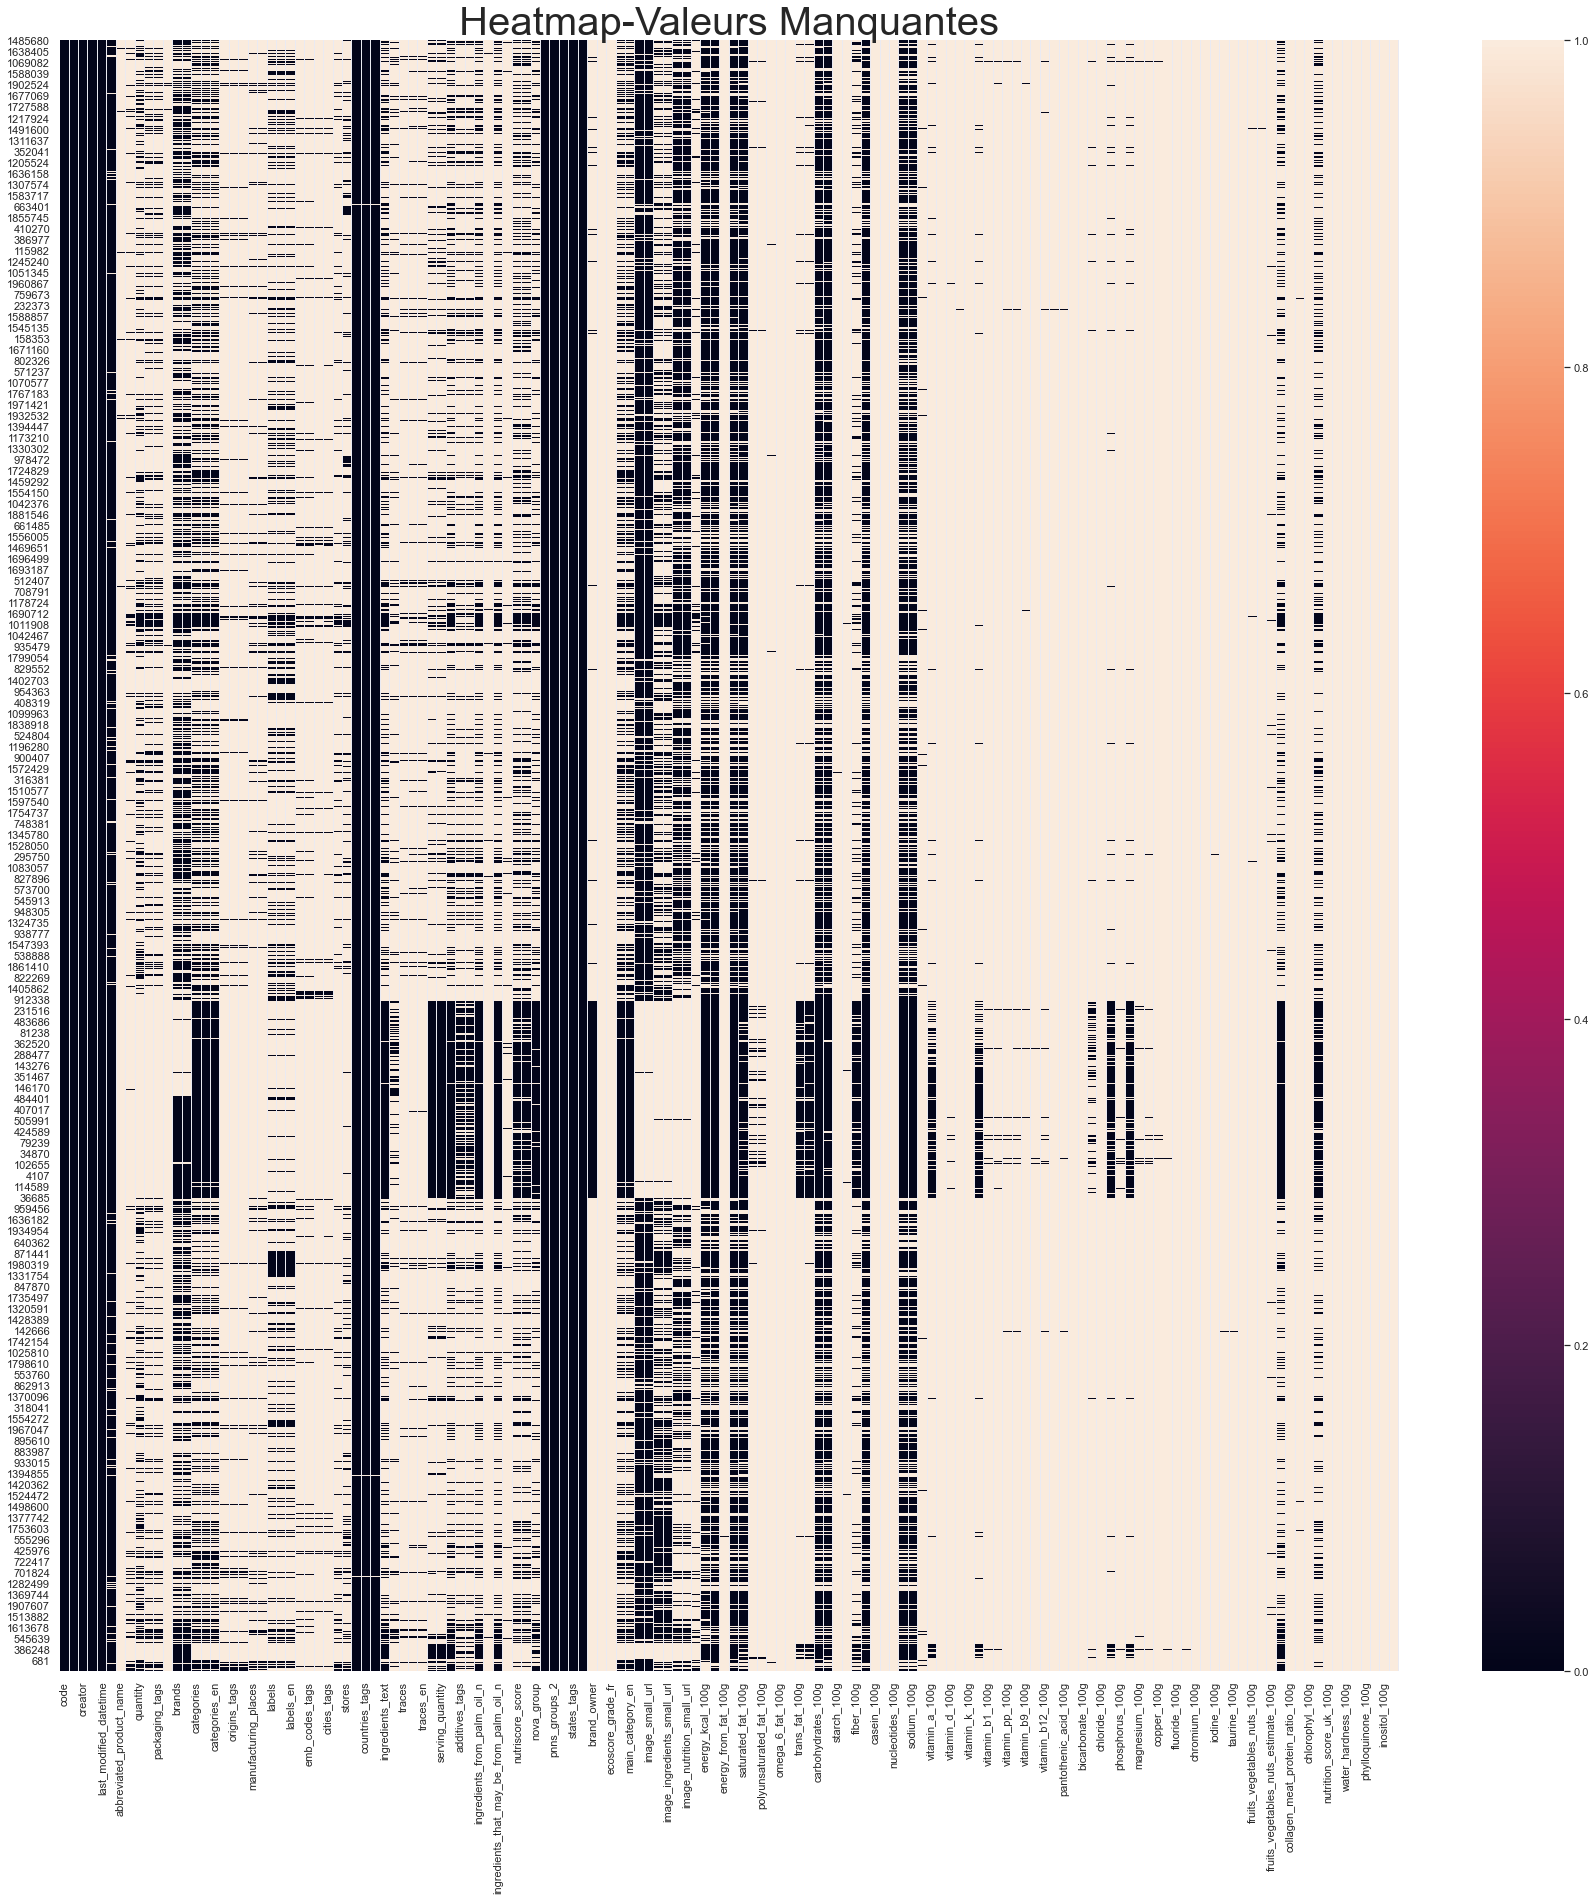

In [31]:
# Heat map / les valeurs manquantes 
fig, ax = plt.subplots(figsize=(30,30))
sns.color_palette("rocket_r", as_cmap=True)
ax = sns.heatmap(df4.isnull(), cbar=True, fmt="d")
plt.title('Heatmap-Valeurs Manquantes', size = 40)
sns.set(font_scale=3)
plt.savefig("Heatmap_remplissage.png",bbox_inches='tight')    

 **- Le heatmap montre qu'après avoir supprimé les colonne composé de Null (voir plus haut), Il y a des variables qui sont très peu renseignées.**

   - **On traite les valeurs maquantes en deux étapes :**

  - I  - Supprimer les variables avec plus de 80% de Null. 
  - II - Supprimer les lignes avec plus de 80% de NUll

##### I  - Supprimer les variables avec plus de 80% de Null 

In [32]:
# Créer un dataframe par ordre décroissant de pourcnetages de Null par variables 

df_missing_col = pd.DataFrame((df4.isnull().sum()/df4.shape[0])*100)
df_missing_col.reset_index(inplace = True)
df_missing_col.columns = ['nom de variable', 'pourcentage de null']

In [33]:
# identifier les variables avec moins de 80% valeur manquantes
var_rempli = df_missing_col.loc[(df_missing_col['pourcentage de null'] <= 80)]

var_to_keep = var_rempli['nom de variable'].tolist()

# Créer un nouveau dataframe 
df5= df4[var_to_keep]

print("Nombre des colonnes avec plus de 80 % de valeurs manquantes : ", df1.shape[1]-df5.shape[1])
#print('****')
print("Pourcentage total de valeurs Null dans le jeu de donnée ", taux_null_total(df5))

Nombre des colonnes avec plus de 80 % de valeurs manquantes :  129
Pourcentage total de valeurs Null dans le jeu de donnée  40.560136791387265


- On a supprimé 129 variables avec plus de 80% de NULL
- Environ 40% de jeu de donnée n'est pas renseignée
     


##### II - Supprimer les lignes avec plus de 80% de NUll

Text(0, 0.5, 'Nombre de lignes')

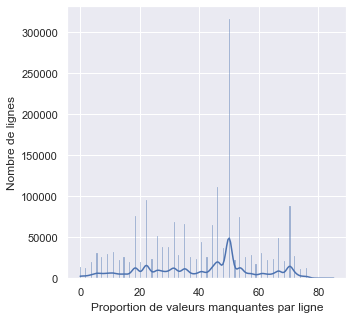

In [34]:
#Créer une séries par ordre décroissant des moyen de proportions de valeurs manquantes par lignes

missing_raw = (df5.isnull().mean(axis=1)*100).sort_values(ascending= False)

#Distribution de la proportion des valeurs manquantes sur les lignes 
plt.figure(figsize=(5,5))
sns.set(font_scale = 1)
sns.histplot(missing_raw, kde=True)
plt.xlabel("Proportion de valeurs manquantes par ligne")
plt.ylabel("Nombre de lignes")

In [35]:
print("Mode de la proportion des valeurs manquantes sur les lignes :", missing_raw.mode())
print("Median de la proportion des valeurs manquantes sur les lignes :", missing_raw.median())

Mode de la proportion des valeurs manquantes sur les lignes : 0    50.0
dtype: float64
Median de la proportion des valeurs manquantes sur les lignes : 44.44444444444444



- Les produits ont le plus souvent environ 50% de valeurs manquantes. (mode) 
       
- Environ 44% des lignes ont des valeurs manquantes (median)


In [36]:
# Créer un dataframe pour détecter les lignes avec plus de 80% de Null
df_missing_raw= pd.DataFrame(data =missing_raw, columns = ['pourcentage de null'])


#Identifier l'index des ligne avec plus de 80 pourcent de null 
raw_rempli = df_missing_raw.loc[(df_missing_raw['pourcentage de null'] > 80)]

index_to_drop = raw_rempli.index

print("Nombre des lignes avec plus de 80% de Null à supprimer :", len(index_to_drop))

# supprimer les lignes avec plus de 80 de valeur manquantes 
df_cleaned= df5.drop(labels= index_to_drop, axis=0)


Nombre des lignes avec plus de 80% de Null à supprimer : 360


In [37]:
print('Pourcentage totale de valeur manquantes après le macro nettoyage :', taux_null_total(df_cleaned))


Pourcentage totale de valeur manquantes après le macro nettoyage : 40.55210788363342


In [38]:
# Comparer la dimension de le jeu de données avec le jeu de donnée avant et après le macro nettoyage des valeurs manquantes

clean = pd.DataFrame({'Nom' : ['données initiales','données nettoyées'],
                           
                            'Dimensions' : [data.shape, df_cleaned.shape],                       
                            'Proportion de NaN (en %)' :
                            [taux_null_total(data),taux_null_total(df_cleaned)]
                             })

clean

,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(2011182, 187)",80.029820
1,données nettoyées,"(1835753, 54)",40.552108


- **Basé sur le taux de remplissage des variables, on choisit l'idée pour une application**
- **On a un dataframe presque nettoyé pour le filter** 

## 3 - Idée de l'application : introduction au régime cétogène (Ketogenic diet)

## L'application 


### 1- Keto score 
- Nous allons concevoir une application qui pourrait aider les consommateurs qui souhaite suivre un régime cétogène. 
- Le régime cétogène est un régime riche en lipides particulièrement à la mode depuis quelques années. Ce régime vise à réduire considérablement la consommation de glucides au profit des lipides pour provoquer un [état de cétose](https://www.maxdegenie.com/conseils-et-astuces/quest-ce-que-la-cetose-et-comment-latteindre/).
- Le [régime cétogène](https://easyketo.fr/calculer-ses-macros/) se caractérise par la consommation de :

       -Glucide : 5% des calories totales journalière;   
       -Lipide :  75% des calories total journalières;   
       -Protéine :  20% des calories total journalières;

- Après avoir identifier le produit, l'application retourne un "ketoscore" entre 0-10. 
        - score 8 à 10:"Excellent"
        - score 6 à 8 : "Very good"
        - score 4 à 6 : "Good"
        - score 2 à 4 : "Poor"
        - score 0 à 2 : "Very Poor"

## 4 - Filtrer le jeu de donnée en function d'idée de l'application

        - 4.1 Choix des variable potentiellement perinentes pour l'application
        - 4.2 Choix définitif des variables 

### 4.1 Choix des variable potentiellement perinentes pour l'application

In [39]:
# Identifier les columns potentiellement pertinent pour l'application

# Les nutriments : 
df_fat= df_cleaned.iloc[:,df_cleaned.columns.str.contains('fat')]
fat = df_fat.columns.tolist()

df_energy = df_cleaned.iloc[:,df_cleaned.columns.str.contains('energy')]
energy = df_energy.columns.tolist()

df_carbohydrates = df_cleaned.iloc[:,df_cleaned.columns.str.contains('carbohydrates')]
carbohydrates= df_carbohydrates.columns.tolist()

df_sugars = df_cleaned.iloc[:,df_cleaned.columns.str.contains('sugars')]
sugar = df_sugars.columns.tolist()


df_proteins= df_cleaned.iloc[:,df_cleaned.columns.str.contains('proteins')]
proteins = df_proteins.columns.tolist()

# les informations générales sur chaque produit

df_brands= df_cleaned.iloc[:,df_cleaned.columns.str.contains('brands')]
brands = df_brands.columns.tolist()


df_score = df_cleaned.iloc[:,df_cleaned.columns.str.contains('score')]
score = df_score.columns.tolist()


df_category =df_cleaned.iloc[:, df_cleaned.columns.str.contains('category')]
category= df_category.columns.tolist()


df_product= df_cleaned.iloc[:,df_cleaned.columns.str.contains('product')]
product = df_product.columns.tolist()


df_code = df_cleaned.iloc[:,df_cleaned.columns.str.contains('code')]
code = df_code.columns.tolist()


df_country= df_cleaned.iloc[:,df_cleaned.columns.str.contains('countries')]
country= df_country.columns.tolist()

df_tag= df_cleaned.iloc[:,df_cleaned.columns.str.contains('tag')]
tag= df_tag.columns.tolist()

# Créer une liste des variables potentiellement pertinentes pour l'application de 'Ketoscore'
variables = tag + category + brands + fat + energy +\
                carbohydrates + sugar + proteins + country + product + code  + score

# Function pour supprimer les colonnes dupliquées63
def remove_duplicates(l):
    return list(set(l))

var = remove_duplicates(variables)

# Afficher le nombre de variable potentiellement pertinentes
print(len(var))
var

23


['additives_tags',
 'countries_tags',
 'main_category',
 'energy_100g',
 'energy_kcal_100g',
 'nutriscore_score',
 'proteins_100g',
 'nutriscore_grade',
 'categories_tags',
 'labels_tags',
 'code',
 'carbohydrates_100g',
 'countries_en',
 'main_category_en',
 'product_name',
 'brands_tags',
 'sugars_100g',
 'brands',
 'saturated_fat_100g',
 'countries',
 'nutrition_score_fr_100g',
 'states_tags',
 'fat_100g']

### 4.2 Choix définitif des variables 

In [40]:
appli_keto = df_cleaned[[
 'product_name',
 'nutriscore_grade',
 'proteins_100g',
 'fat_100g',
 'sugars_100g',
 'energy_kcal_100g',
 'code',
 'countries_en',
 'carbohydrates_100g',
 'nutriscore_score',
'main_category_en', 'brands',
'saturated_fat_100g']]

appli_keto.reset_index(inplace = True)
appli_keto =appli_keto.drop(labels = 'index', axis = 1)


## 5- Identifier les typage de "missingness"

- On utilise le package "missingno" pour identifier le type de missingness dans le jeu de donnée 

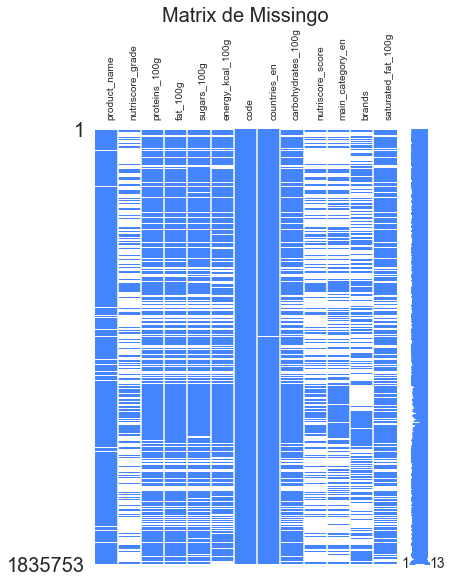

In [41]:
# Visualiser les valuers manquantes avec matrix plot
msno.matrix(appli_keto, figsize=(6, 8), color=(0.27, 0.52, 1.0))
plt.xticks(rotation= 90, fontsize = 10)
plt.title("Matrix de Missingo", fontsize = 20)
plt.savefig("missingness",bbox_inches='tight')    

<AxesSubplot:>

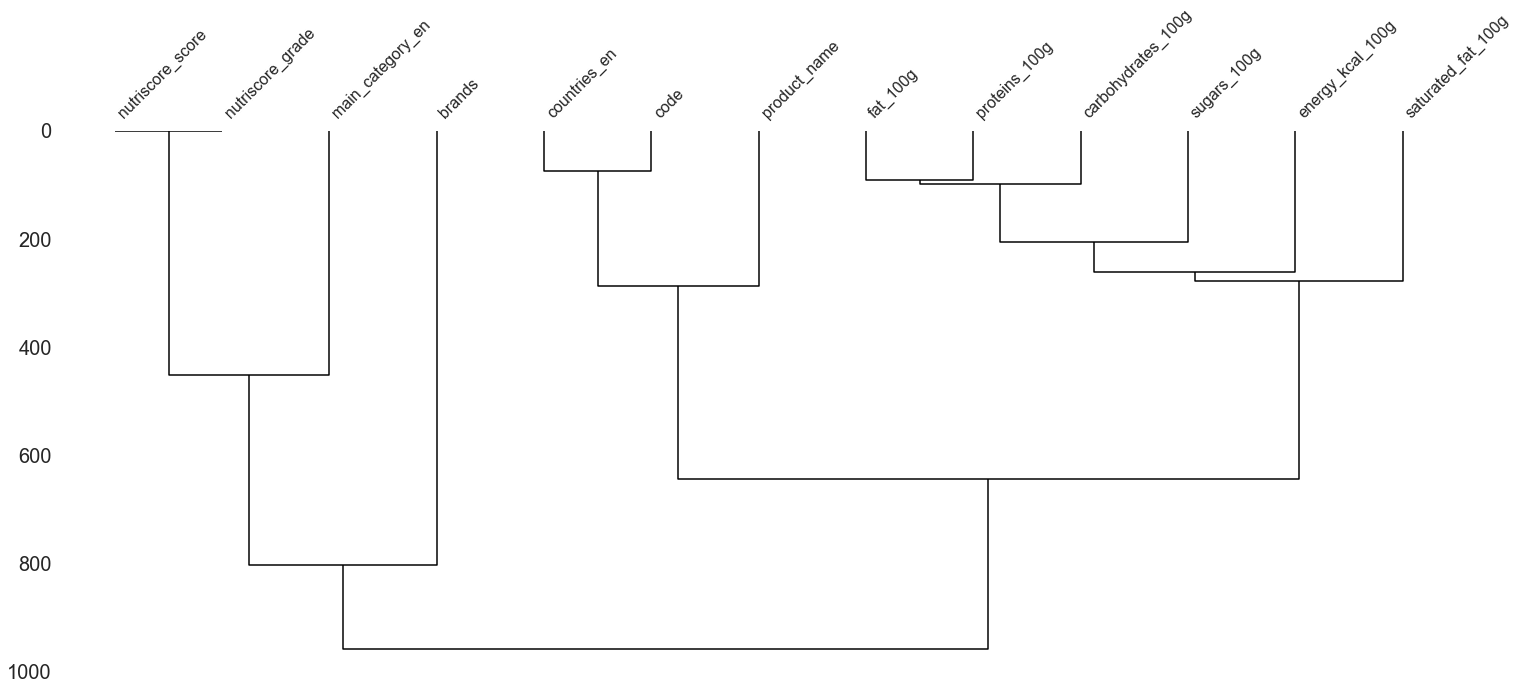

In [42]:
msno.dendrogram(appli_keto)


#Exporter la graphique
#plt.savefig("msno_dandrogram",bbox_inches='tight')  

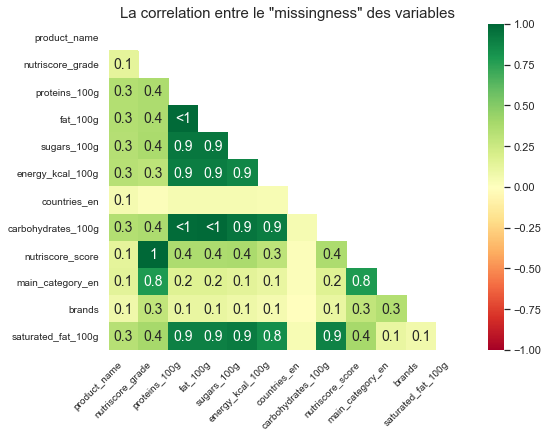

In [43]:
# La correlation entre le "missingness" des variable avec heatmap

msno.heatmap(appli_keto, figsize=(8, 6), cmap="RdYlGn")
plt.xticks(rotation= 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('La correlation entre le "missingness" des variables', size = 15)
plt.savefig('msno_heatmap.png', bbox_inches='tight')

- On constate qu'il y a une forte relation de "missingness" entre les variables  "sugar", "protein", "fat", "energy" et "carbohydrates"et "salt" ainsi qu'entre "nutriscore grade" et "main category".
- On va vérifier cela avec le matrix de missingo après avoir le trier par l'une de ces variables

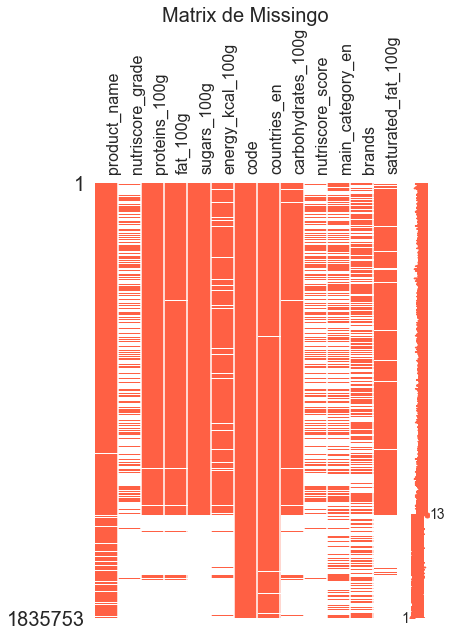

In [44]:
msno.matrix(appli_keto.sort_values(by = 'sugars_100g', ascending = False), figsize=(6, 8), color=(1, 0.38, 0.27))
plt.xticks(rotation= 90)
plt.title("Matrix de Missingo", fontsize = 20)

#Exporter la graphique
plt.savefig('msno_matrix2.png',bbox_inches='tight')


 ### Bilans sur le type de missingness dans le jeu de donnée : 
   
- Pour le variable 'product name', les valeurs manquantes sont aléatoirs et leur nombre est faible. Les valeurs manquant sont donc complètement au hasard (MCAR = Missing Completely At Random).
- On constate que pour les variable relatives aux nutriments ("energy_k_100g","fat_100g", sugars_100g, "protein_100g"...) il s'agit d'un cas plus large de MCAR. Même si les données manquantes peuvent sembler aléatoires à première vue, elles auront une relation systématique entre eux. (MAR = Missing At Random) 


### 2.2 - Examiner trois stratégies pour l'imputation des valeurs manquantes


##### Pour le traitement des valuers manquantes on va essayer trois stratégie : 
   -   **moyenne**
   -   **médiane**
   -   **Knn Imputer** : Vu la corrélation entre les missingness des variablen, on essaie une approche de "Multivariate feature imputation" comme "K-Nearest Neighbor Imputation" (knn Imputation)
   - Deux critères pour évaluer chaque stratégie :
       - Le temps de l'exécution des code 
       - Comparer la distribution de donnée avant et après l'imputation

#####  Imputer  les valeurs manquantes par  le"moyenne"


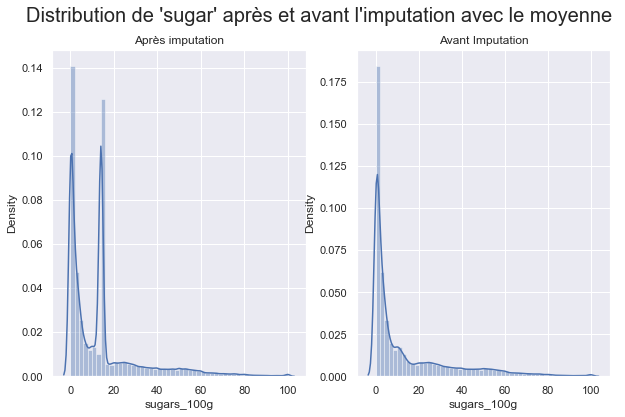

In [45]:
# créer un dataframe avec les variables numériques
numb_missing= appli_keto.loc[:, appli_keto.dtypes == np.number]
numb_missing.head(3)


# Imputer les valeuer manquantes avec SimpleImputer
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

miss_mean_imputer = miss_mean_imputer.fit(numb_missing)

imputed_mean = pd.DataFrame(miss_mean_imputer.transform(numb_missing.values), columns = numb_missing.columns)

# Comparer la distrubution de variable "suger" avant et après l'imputation
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de 'sugar' après et avant l'imputation avec le moyenne ", fontsize = 20)
sns.set(font_scale= 1)

ax1 = sns.distplot(imputed_mean['sugars_100g'], ax=axes[0])
ax1.set_title("Après imputation")

ax2 = sns.distplot(numb_missing['sugars_100g'], ax=axes[1])
ax2.set_title("Avant Imputation")

#Exporter la graphique
plt.savefig("mean_sugar",bbox_inches='tight')    

In [46]:
for column in numb_missing.columns:
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', numb_missing[column].mean(), ' / ', imputed_mean[column].mean())
    print('Ecart-Type (Avant / Après) : ', numb_missing[column].std(), ' / ', imputed_mean[column].std())
    print("****")


Traitement de la variable  proteins_100g
Moyenne (Avant / Après) :  8.836332766388788  /  8.836332766378483
Ecart-Type (Avant / Après) :  10.067604408552013  /  8.836458432034517
****

Traitement de la variable  fat_100g
Moyenne (Avant / Après) :  14.10467823563624  /  14.104678235697136
Ecart-Type (Avant / Après) :  16.539591654594872  /  14.509674172006568
****

Traitement de la variable  sugars_100g
Moyenne (Avant / Après) :  14.165349678520705  /  14.165349678423638
Ecart-Type (Avant / Après) :  20.084242789795603  /  17.535794368013796
****

Traitement de la variable  energy_kcal_100g
Moyenne (Avant / Après) :  273.5770170394148  /  273.57701704287314
Ecart-Type (Avant / Après) :  182.65350781673166  /  158.15413995325508
****

Traitement de la variable  carbohydrates_100g
Moyenne (Avant / Après) :  29.204385600322826  /  29.20438560045025
Ecart-Type (Avant / Après) :  28.124940065485234  /  24.67178988686953
****

Traitement de la variable  nutriscore_score
Moyenne (Avant / Aprè

- **La distrubution de donnée a été changé on peut donc conclure qu'utilier la moyennes pour remplir les données manquantes n'est pas une stratégie pertinente.**

#####  Imputer  les valeurs manquantes par le "median"

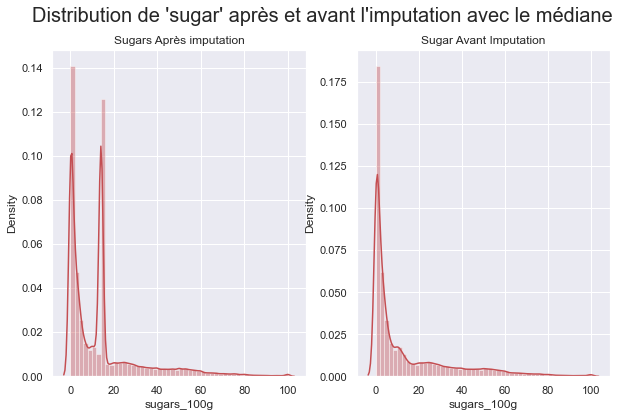

In [47]:
# Imputer les valeuer manquantes avec SimpleImputer
miss_median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
miss_median_imputer = miss_mean_imputer.fit(numb_missing)

imputed_median = pd.DataFrame(miss_median_imputer.transform(numb_missing.values), columns = numb_missing.columns)

# Comparer la distrubution de variable "suger" avant et après l'imputation
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de 'sugar' après et avant l'imputation avec le médiane", fontsize = 20)
sns.set(font_scale= 1)

ax1 = sns.distplot(imputed_median['sugars_100g'], ax=axes[0], color = 'r')
ax1.set_title("Sugars Après imputation")

ax2 = sns.distplot(numb_missing['sugars_100g'], ax=axes[1], color = 'r')
ax2.set_title("Sugar Avant Imputation")

# Exporter la graphqique
plt.savefig("median_sugar",bbox_inches='tight')           

In [48]:

for column in numb_missing.columns:
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', numb_missing[column].mean(), ' / ', imputed_median[column].mean())
    print('Ecart-Type (Avant / Après) : ', numb_missing[column].std(), ' / ', imputed_median[column].std())
    print("****")


Traitement de la variable  proteins_100g
Moyenne (Avant / Après) :  8.836332766388788  /  8.836332766378483
Ecart-Type (Avant / Après) :  10.067604408552013  /  8.836458432034517
****

Traitement de la variable  fat_100g
Moyenne (Avant / Après) :  14.10467823563624  /  14.104678235697136
Ecart-Type (Avant / Après) :  16.539591654594872  /  14.509674172006568
****

Traitement de la variable  sugars_100g
Moyenne (Avant / Après) :  14.165349678520705  /  14.165349678423638
Ecart-Type (Avant / Après) :  20.084242789795603  /  17.535794368013796
****

Traitement de la variable  energy_kcal_100g
Moyenne (Avant / Après) :  273.5770170394148  /  273.57701704287314
Ecart-Type (Avant / Après) :  182.65350781673166  /  158.15413995325508
****

Traitement de la variable  carbohydrates_100g
Moyenne (Avant / Après) :  29.204385600322826  /  29.20438560045025
Ecart-Type (Avant / Après) :  28.124940065485234  /  24.67178988686953
****

Traitement de la variable  nutriscore_score
Moyenne (Avant / Aprè


- **On peut constater qu'imputer les valeurs manquantes par le median n'est plus une bonne stratégie, car la distrubution de donnée a été changée**


##### Imputer les valeurs manquantes par  k-Nearest Neighbors algorithme

In [49]:
# On choisi un sample de jeu de données en sélectionnant 10000 premières lignes 
sample = numb_missing.head((10000))
print(taux_null_total(sample))

31.594285714285714


In [50]:
%%time

imputer =  KNNImputer(n_neighbors=6)

sample_imputed= pd.DataFrame(imputer.fit_transform(sample), columns = sample.columns)

Wall time: 4.21 s


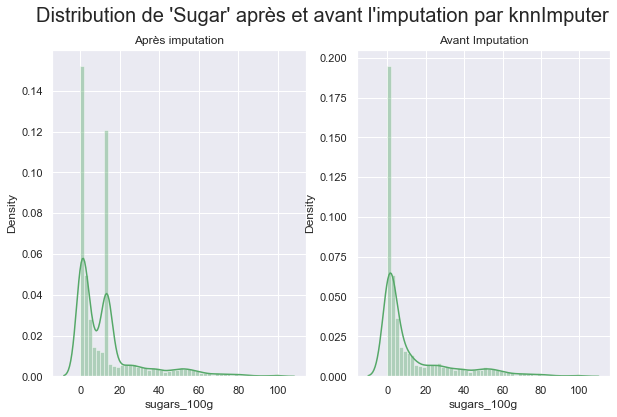

In [51]:
# Visualiser la distrubution de variable "suger" avant et après l'imputation
f, axes = plt.subplots(1,2, figsize=(10,6))
f.suptitle("Distribution de 'Sugar' après et avant l'imputation par knnImputer", fontsize = 20)
sns.set(font_scale= 1)

ax1 = sns.distplot(sample_imputed['sugars_100g'], ax=axes[0], color = 'g')
ax1.set_title("Après imputation")

ax2 = sns.distplot(sample['sugars_100g'], ax=axes[1], color = 'g')
ax2.set_title("Avant Imputation")


plt.savefig("knn_sugars",bbox_inches='tight')    

In [52]:
# Comparer la distrubution de variable "suger" avant et après l'imputation
for column in numb_missing.columns:
    print('\nTraitement de la variable ',column)
    print('Moyenne (Avant / Après) : ', sample[column].mean(), ' / ', sample_imputed[column].mean())
    print('Ecart-Type (Avant / Après) : ', sample[column].std(), ' / ', sample_imputed[column].std())
    print("****")


Traitement de la variable  proteins_100g
Moyenne (Avant / Après) :  8.764762394863018  /  8.650930911691786
Ecart-Type (Avant / Après) :  9.422645208693359  /  8.286317658154394
****

Traitement de la variable  fat_100g
Moyenne (Avant / Après) :  15.241311835078529  /  15.033294802597474
Ecart-Type (Avant / Après) :  17.993018246256653  /  15.778108533482417
****

Traitement de la variable  sugars_100g
Moyenne (Avant / Après) :  13.58451793284427  /  13.469129647352835
Ecart-Type (Avant / Après) :  19.99451356253595  /  17.509834643734965
****

Traitement de la variable  energy_kcal_100g
Moyenne (Avant / Après) :  286.36143714488  /  281.9260861857992
Ecart-Type (Avant / Après) :  190.98612660463382  /  167.8509425938793
****

Traitement de la variable  carbohydrates_100g
Moyenne (Avant / Après) :  29.740864632649178  /  29.3650019172604
Ecart-Type (Avant / Après) :  28.13910350046052  /  24.796020939376998
****

Traitement de la variable  nutriscore_score
Moyenne (Avant / Après) :  1

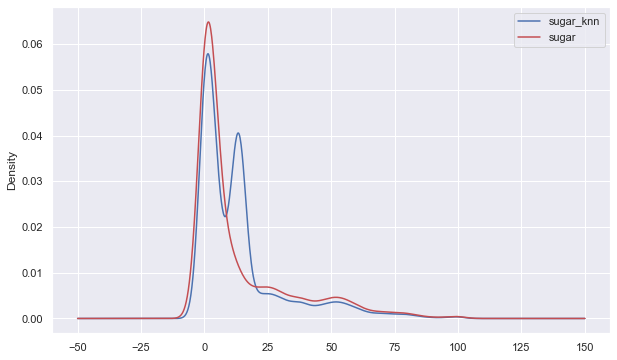

In [53]:
sugar_knn = sample_imputed["sugars_100g"].tolist()
sugar_sample = sample['sugars_100g'].tolist()

mydf_sugar = pd.DataFrame(list(zip(sugar_knn, sugar_sample)), columns = ['sugar_knn', 'sugar'])

#ggplot(mydf3) + aes(x='sugar', color='sugar_knn') + geom_density()

plt.figure(figsize=(10,6))
mydf_sugar['sugar_knn'].plot(kind='kde',color='b')
mydf_sugar['sugar'].plot(kind='kde',color='r')
plt.legend()



- **Il semble que l'algorithme KNN est l'approche la plus pertinente, car la distribution de donnés n'a pas été largement modifiée.** 
- **Néanmois il s'agit d'une algorithme complexe dont l'exécution exige beaucoup de temps sur l'ensemble de jeu de donnée.** 
- **Ainsi pour l'analyse exploiratoire et l'implentation de l'application on va se limiter aux lignes qui sont totalement renseignés** 


In [54]:
# Choisir les lignes remplies
appli_final = appli_keto[appli_keto.notna().all(axis=1)]
appli_final.reset_index(drop=True, inplace=True) 


appli_final.head()

,product_name,nutriscore_grade,proteins_100g,fat_100g,sugars_100g,energy_kcal_100g,code,countries_en,carbohydrates_100g,nutriscore_score,main_category_en,brands,saturated_fat_100g
0,Vegan Almond Ice Cream 3 x,d,2.000000,16.0,19.00,248.000000,8714100658499,"Australia,France,Germany,Spain,United Kingdom",23.000000,15.0,Ice creams,Magnum,9.80
1,Crunchy peanut butter,d,25.000000,50.0,6.25,593.750000,11110791559,United States,21.880000,13.0,Peanut butters,Simple Truth Organic,7.81
2,Cheese Tomato & Basil,d,10.000000,22.0,5.00,474.000000,7300400127387,"France,Germany,Poland,Switzerland",56.500000,15.0,Crispbreads,"Wasa,Wasa Sandwich",8.50
3,Honey Rings,b,6.666667,0.0,20.00,366.666667,808912018614,Canada,86.666667,2.0,Cereals with honey,farm boy,0.00
4,Pepperkaker,d,5.800000,14.7,26.40,480.000000,7037421091075,"France,Norway",72.900000,18.0,Gingerbreads,"Bjørken,Baxt",1.20


In [55]:
# Comparer la dimension de le jeu de données avec le jeu de donnée initiale avant et après le filtrer pour l'application

appli_data = pd.DataFrame({'Nom' : ['données initiales', 'données nettoyées'],
                           
                            'Dimensions' : [data.shape, appli_final.shape],                       
                            'Proportion de NaN (en %)' :
                            [taux_null_total(data),taux_null_total(appli_final)]
                             })

appli_data

,Nom,Dimensions,Proportion de NaN (en %)
0,données initiales,"(2011182, 187)",80.02982
1,données nettoyées,"(385652, 13)",0.00000


In [56]:
# Exporter le fichier pour l'application en format CSV 
appli_final.to_csv(r"C:\Users\faeze\Documents\OC data science\PROJECT\Projet3\appli_final.csv")

# FIN DE NOTEBOOK DE NETTOYAGE